**DATA UNDERSTANDING ASSIGNMENT**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
#creating a new dataframe to use in the data understanding
understanding_df = df.select_dtypes(exclude="object").drop(columns=['Id','MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MiscVal','PoolArea','MoSold'])

In [ ]:
understanding_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,1710,2003.0,548,0,61,0,0,0,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,1262,1976.0,460,298,0,0,0,0,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,1786,2001.0,608,0,42,0,0,0,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,1717,1998.0,642,0,35,272,0,0,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,2198,2000.0,836,192,84,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,1647,1999.0,460,0,40,0,0,0,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,2073,1978.0,500,349,0,0,0,0,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,2340,1941.0,252,0,60,0,0,0,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,1078,1950.0,240,366,0,112,0,0,2010,142125


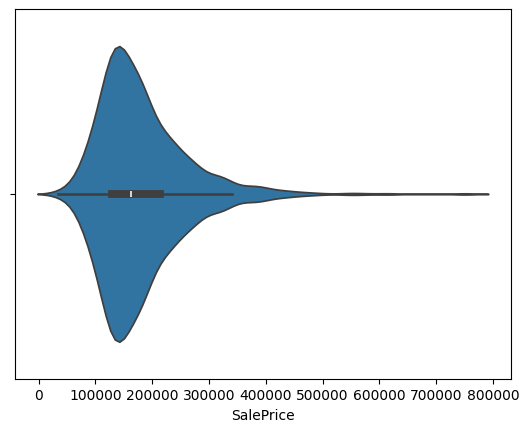

In [ ]:
sns.violinplot(data=understanding_df,x='SalePrice')
plt.show()
#la majorite de prix de vente sont compris 100000 et 300000 (useless fl training mais par curiosite je voulais savoir)

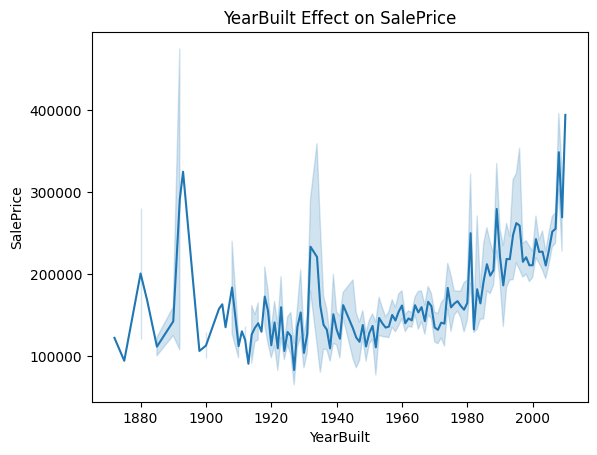

In [ ]:
sns.lineplot(x="YearBuilt", y="SalePrice", data=understanding_df)
plt.title("YearBuilt Effect on SalePrice")
plt.show()

#le diagramme montre que e prix de vente et l annee de construction sont proportionelle la plupart du temps (sauf en quelques annees) avec l exception d avoir des prix tres eleves pour les maisons construite entre 1880 et 1900
# ce ci nous permet de conclure que l annee de construction a une une influence importante sur le prix et qu on ne peut pas negliger cete contrainte

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

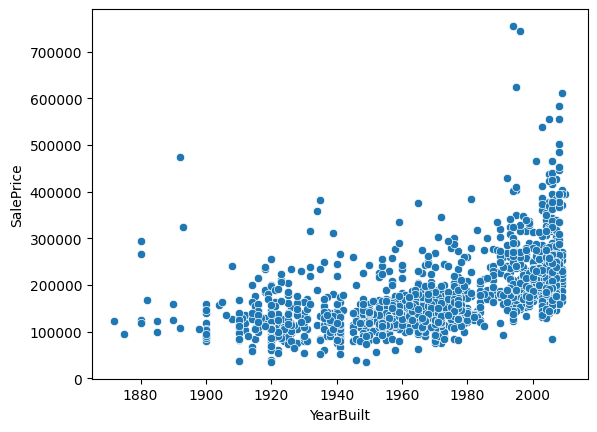

In [ ]:
#pour s assurer de la conclusion ci dessus on va tester la correlation entre l annee de construction et le prix de vente
sns.scatterplot(data=understanding_df,x='YearBuilt',y='SalePrice')
#le diagramme montre une correlation moyenne entre l annee de construction et le prix de vente

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

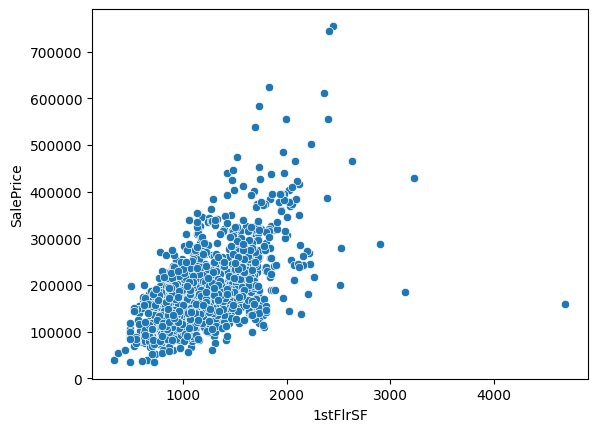

In [ ]:
# on va tester la correlation entre la surface de la 1ere etage et le prix de vente
df=understanding_df.loc[understanding_df["2ndFlrSf"]!=0]
sns.scatterplot(data=df,x='1stFlrSF',y='SalePrice')
#le diagramme montre une correlation importante ==> la surface de la 1ere etage est un facteur important dans la variation du prix de vente

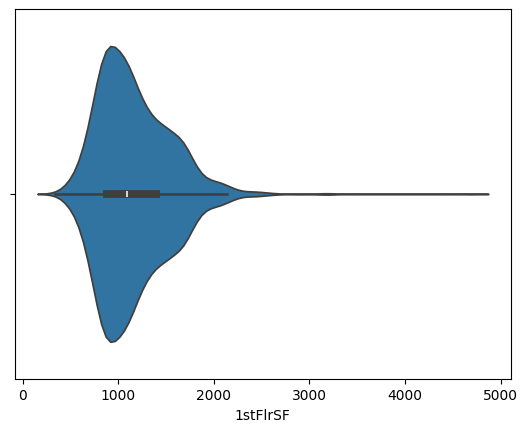

In [ ]:
#vu l importance de la surface de prix de vente dans notre etude, on va tester si il y a des valeures qui peuvent nous deranger durant notre travail
sns.violinplot(data=understanding_df,x="1stFlrSF")
plt.show()
#la plupart des surfaces sont entre 200 et 2000 mais il y a quelques valeures qui peuvent etteindre 3000 (il ne pesente pas de probleme)


<Axes: xlabel='1stFlrSF', ylabel='2ndFlrSF'>

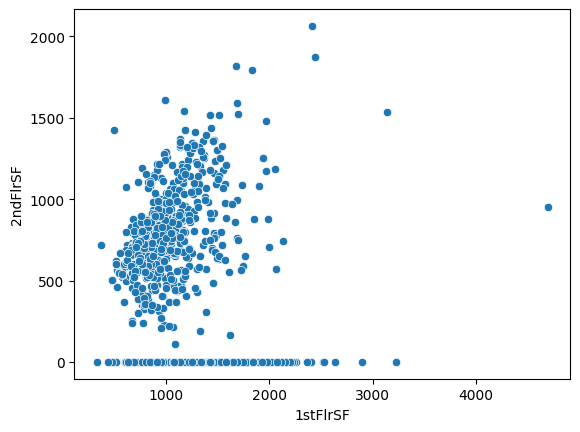

In [ ]:
#on va tester la correlation entre la surface du 1er etage et celui du 2eme etage pour savoir si on peut les fusioner
sns.scatterplot(data=understanding_df,x='1stFlrSF',y='2ndFlrSF')
#on ne peut pas fusionner les 2 colonnes dnc on doit etudier l effet de la surface de la 2eme etage sur le prix de vente

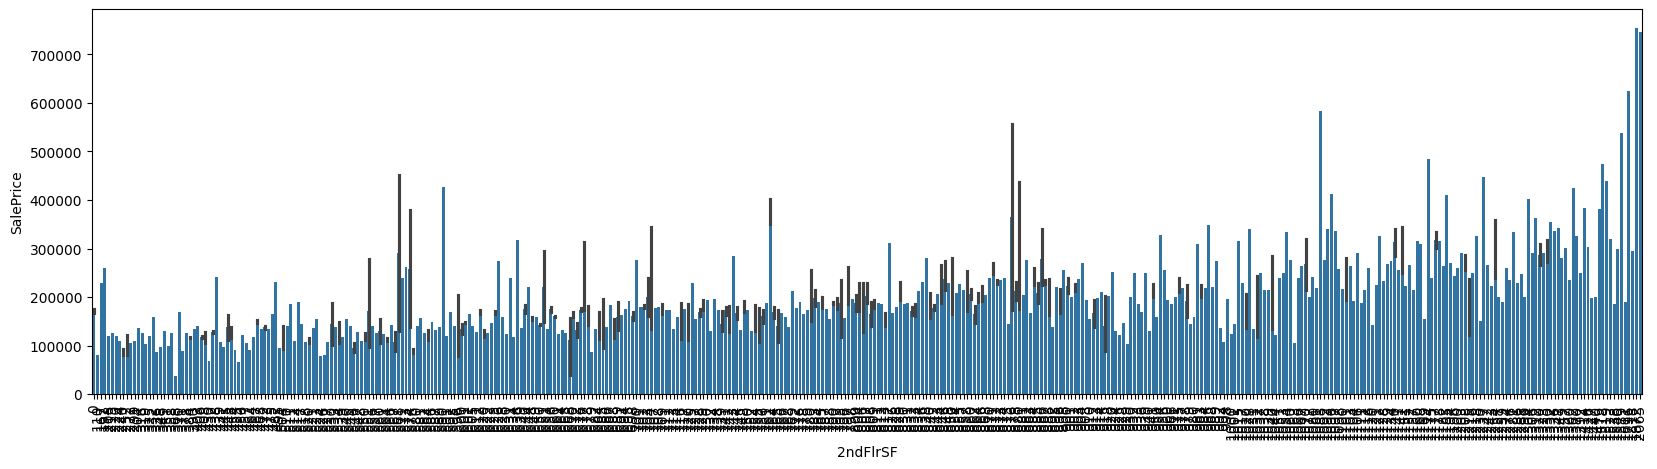

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
keys = understanding_df['2ndFlrSF'].value_counts().keys()
values = understanding_df['SalePrice'].value_counts().values
sns.barplot(data=understanding_df,x='2ndFlrSF', y='SalePrice')
plt.show()
#graph khayeb barcha which explains aalech kammalt b nafs les graphes l khedma lkol

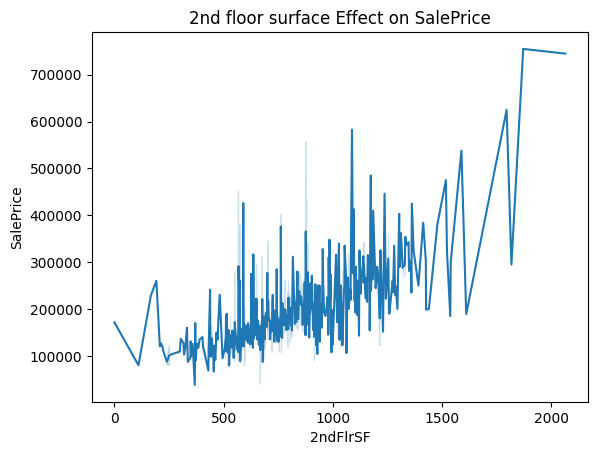

In [ ]:
sns.lineplot(x="2ndFlrSF", y="SalePrice", data=understanding_df)
plt.title("2nd floor surface Effect on SalePrice")
plt.show()
#le graphe montre que la surface et le prix sont proportionelles ce qui suggere qu il y a une correlation forte entre les 2

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

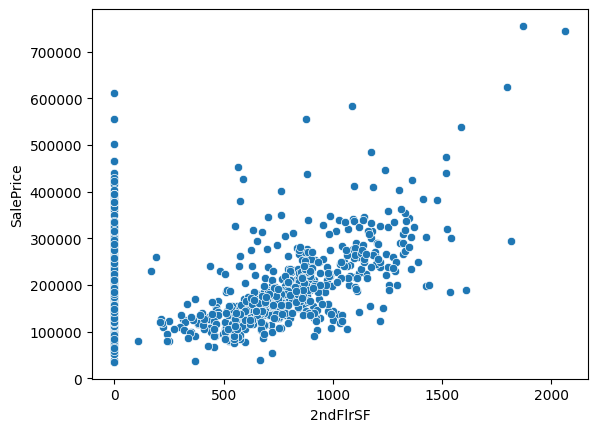

In [ ]:
#on va donc tester la correlation entre la surface du 2eme etage et le prix de vente pour savoir si on peut les fusioner
sns.scatterplot(data=understanding_df,x='2ndFlrSF',y='SalePrice')
#il y a une correlation entre les 2

<Axes: xlabel='BsmtFinSF1', ylabel='BsmtFinSF2'>

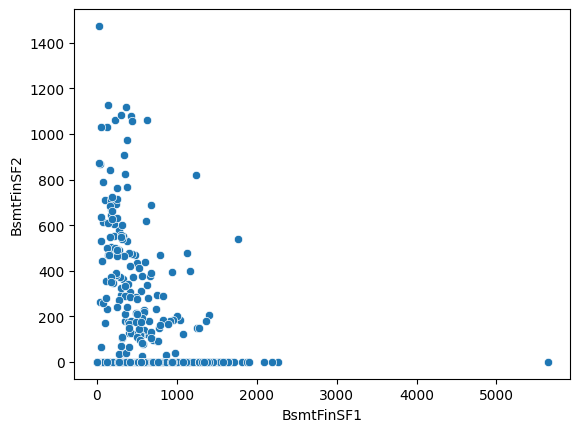

In [ ]:
#on va tester la correlation entre BsmtFinSF1 et BsmtFinSF2 pour savoir si on peut fusionner les 2
df_floor=
sns.scatterplot(data=understanding_df,x='BsmtFinSF1',y='BsmtFinSF2')
#j ai pas pu faire des conclusion a partir de ce graphe mais je pense que la correlation est faible

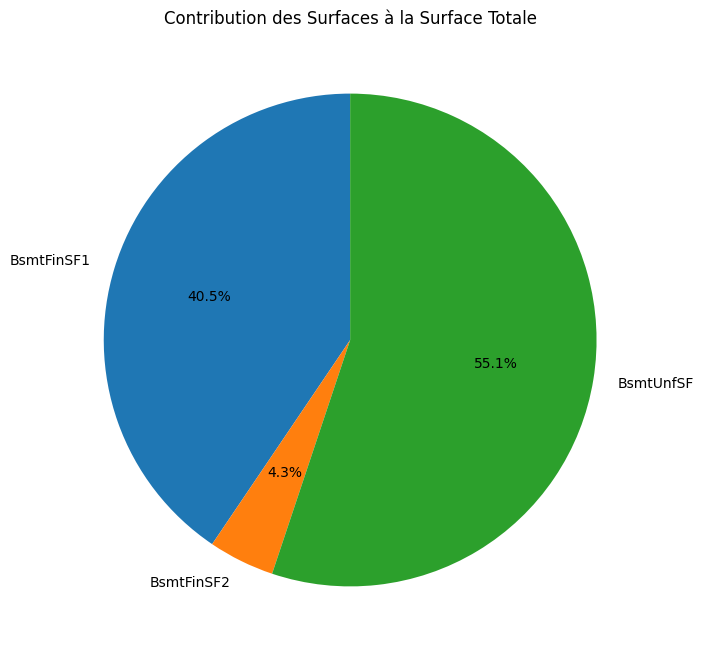

In [ ]:
# Calculer la contribution de chaque surface par rapport à la surface totale
contributions = understanding_df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].divide(understanding_df['TotalBsmtSF'], axis=0)

# Créer un pie chart
plt.figure(figsize=(8, 8))
plt.pie(contributions.mean(), labels=contributions.columns, autopct='%1.1f%%', startangle=90)
plt.title('Contribution des Surfaces à la Surface Totale')
plt.show()
#la contribution de BsmtFinSF2 est tres faible et on peut la negliger par rapport aux autres
#on va donc comparer la correlation entre les 2 surfaces et le prix avec celle de la surface totale et le prix pour savoir si on peut negliger les 2 colonnes

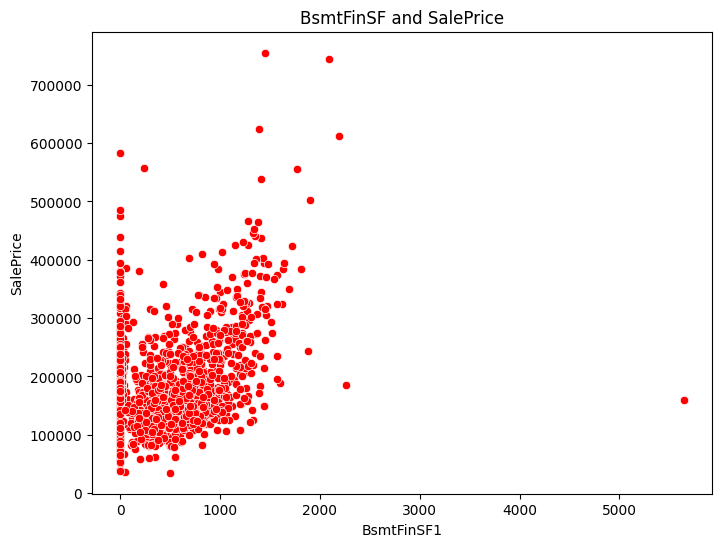

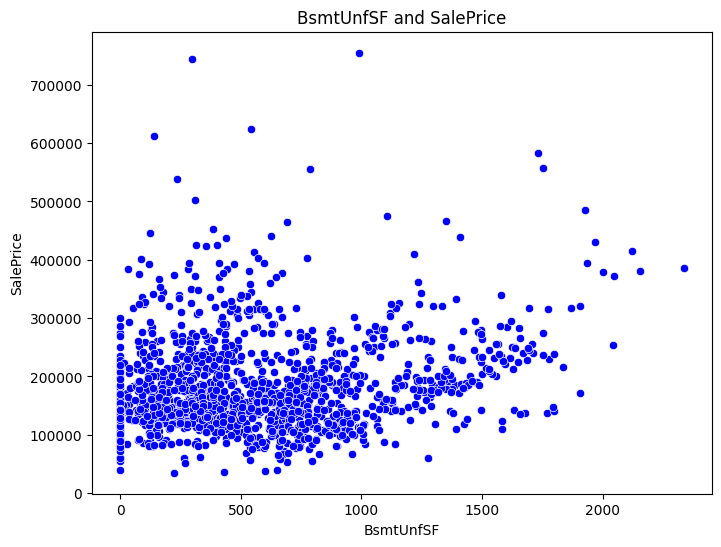

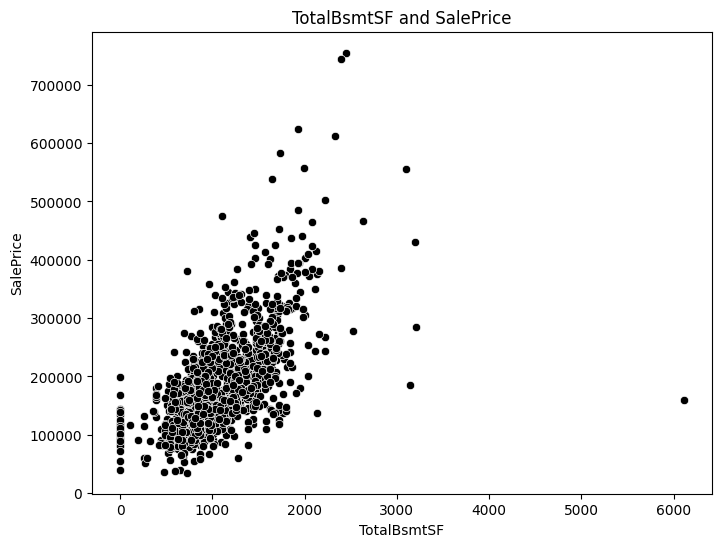

In [ ]:


# Premier graphique : BsmtFinSF and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=understanding_df, x='BsmtFinSF1', y='SalePrice', color="red")
plt.title('BsmtFinSF and SalePrice')
plt.show()

# Deuxième graphique : BsmtUnfSF and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=understanding_df, x='BsmtUnfSF', y='SalePrice', color="blue")
plt.title('BsmtUnfSF and SalePrice')
plt.show()

# Troisième graphique : TotalBsmtSF and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=understanding_df, x='TotalBsmtSF', y='SalePrice', color="black")
plt.title('TotalBsmtSF and SalePrice')
plt.show()
#la comparaison des 3 graphes nous assure que la correlation entre le prix et la surface totale est plus importante donc on peut eliminer les 2 autres colonnes


<Axes: xlabel='YearBuilt', ylabel='YearRemodAdd'>

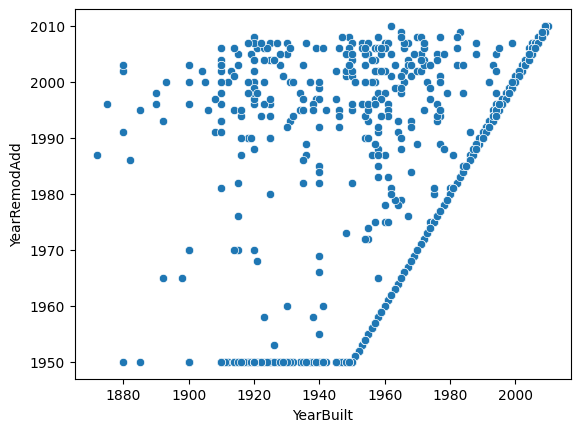

In [ ]:
#on va tester la correlation entre YearBuilt et YearRemodAdd pour savoir si on peut fusionner les 2
sns.scatterplot(data=understanding_df,x='YearBuilt',y='YearRemodAdd')
#forte correlation(surtout a partir de 1940) donc on peut les fusionner mais on va d abbodr comparer leur effet sur le prix de vente

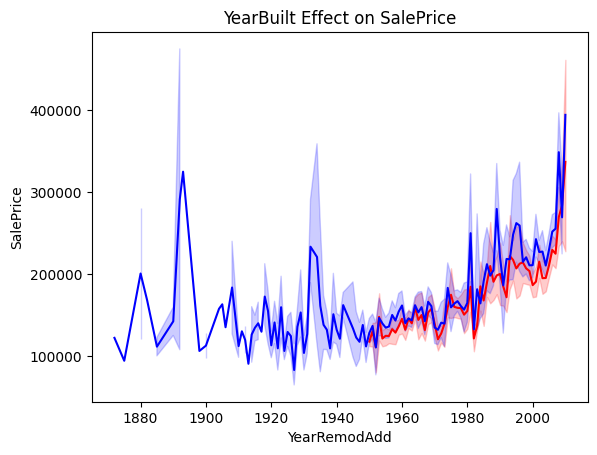

In [ ]:
sns.lineplot(x="YearRemodAdd", y="SalePrice", data=understanding_df,color="red")
plt.title("YearBuilt Effect on SalePrice")
sns.lineplot(x="YearBuilt", y="SalePrice", data=understanding_df,color="blue")
plt.title("YearBuilt Effect on SalePrice")
plt.show()
#===>on peut les fuisonner

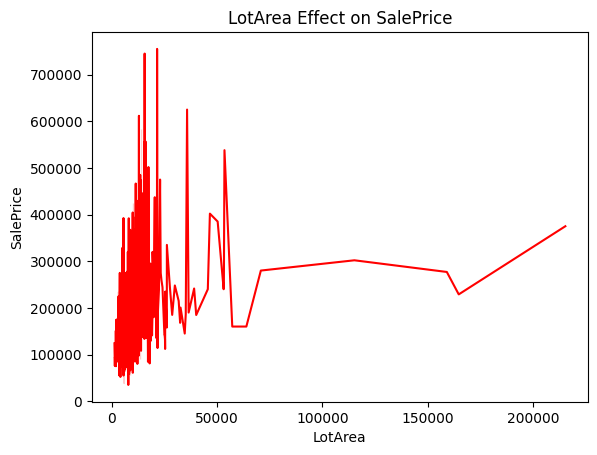

In [ ]:
sns.lineplot(x="LotArea", y="SalePrice", data=understanding_df,color="red")
plt.title("LotArea Effect on SalePrice")
plt.show()
#ce graphe n est pas tres efficace donc on va utiliser scatterplot

<Axes: xlabel='YearBuilt', ylabel='YearRemodAdd'>

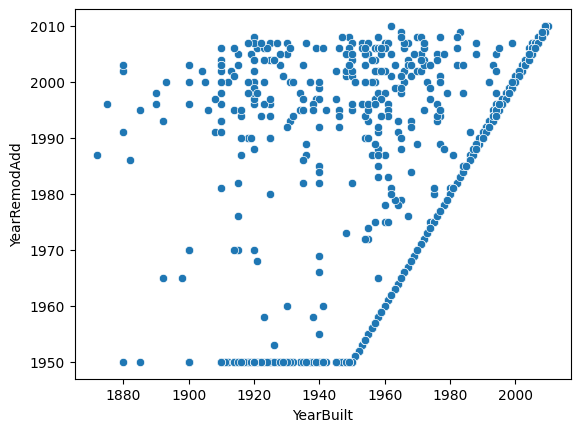

In [ ]:
sns.scatterplot(data=understanding_df,x='YearBuilt',y='YearRemodAdd')
#ce graphe montre une forte correlation entre les 2 donc on va passer a etudier la densite de repartition de LotArea pour savoir si il y aura des valeurs qui nous derangeront durant le travail


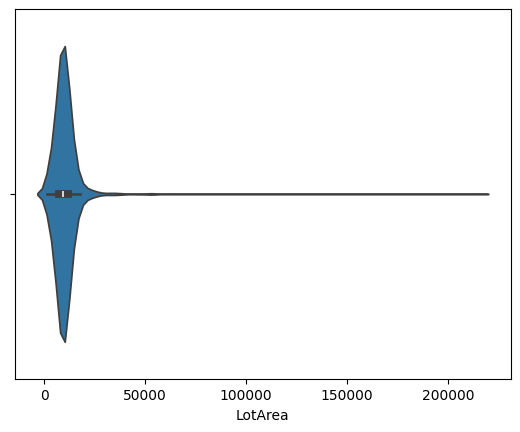

In [ ]:
sns.violinplot(data=understanding_df,x="LotArea")
plt.show()
#la densite de repartition ne montre aucun probleme

<Axes: xlabel='LotArea', ylabel='LotFrontage'>

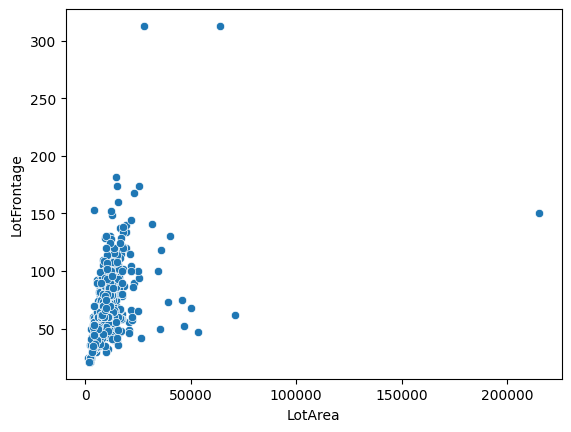

In [ ]:
#on va tester la correlation entre les 2 colonnes pour savoir si on peut les fusionner
sns.scatterplot(data=understanding_df,x='LotArea',y='LotFrontage')
#==> il y a possibilite de fusionner les 2 colonnes
#on va passer a comparer l effet de chaque une sur le prix de vente

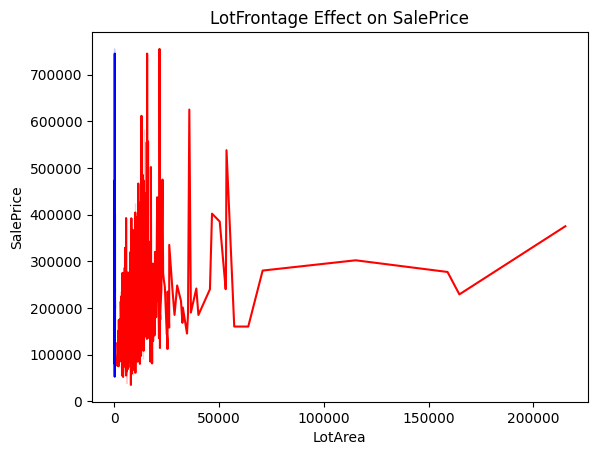

In [ ]:
sns.lineplot(x="LotArea", y="SalePrice", data=understanding_df,color="red")
plt.title("LotArea Effect on SalePrice")
sns.lineplot(x="LotFrontage", y="SalePrice", data=understanding_df,color="blue")
plt.title("LotFrontage Effect on SalePrice")
plt.show()
#==> je n ai pas trouver de conclusion donc on va passer a la comparaison de la correlation des 2 avec le prix de vente

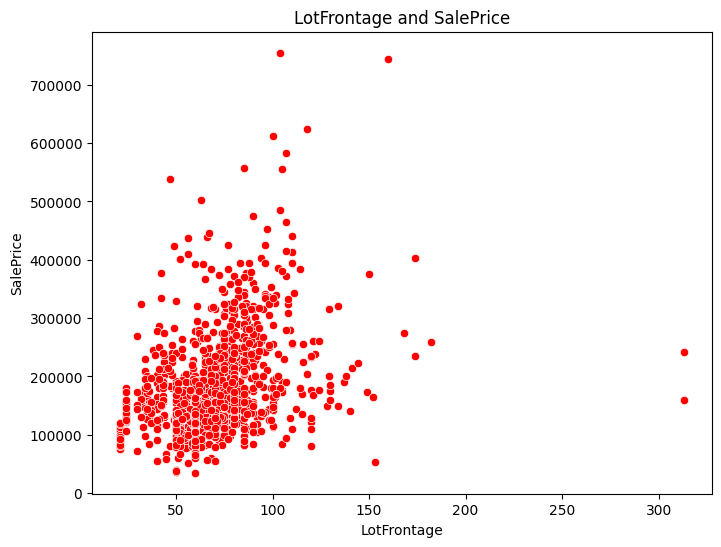

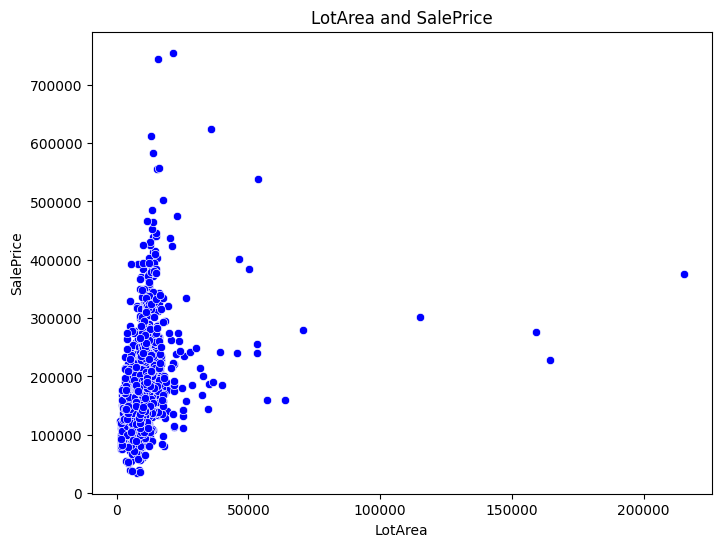

In [ ]:
# Premier graphique : LotFrontage and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=understanding_df, x='LotFrontage', y='SalePrice', color="red")
plt.title('LotFrontage and SalePrice')
plt.show()

# Deuxième graphique : LotArea and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=understanding_df, x='LotArea', y='SalePrice', color="blue")
plt.title('LotArea and SalePrice')
plt.show()

#la comparaison des 2 montre qu on peut negliger lot area car faible correlation